<h1>  Instrumental Variable 2SLS </h1>


just some easy application with some stata datasheet <br>
http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.sta <br>
Got it from: Using R for Introductory Economics - Florian Heiss - page 220.



<h1>  DATASET </h1>

Here I Just load some data and clean + visualize it <br>
I also generate the variable **log_wage**, which is just the log of wage. 

In [1]:
"""
Loading the data and cleaning it from NaNs
getting log of wages

"""


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df = pd.read_stata('mroz.dta')
df = df.dropna(subset=['wage'])
df['log_wage'] = np.log(df['wage'])
df

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq,log_wage
0,1.0,1610.0,1.0,0.0,32.0,12.0,3.3540,2.65,2708.0,34.0,...,0.7215,12.0,7.0,5.0,0.0,14.0,10.910060,1.210154,196.0,1.210154
1,1.0,1656.0,0.0,2.0,30.0,12.0,1.3889,2.65,2310.0,30.0,...,0.6615,7.0,7.0,11.0,1.0,5.0,19.499981,0.328512,25.0,0.328512
2,1.0,1980.0,1.0,3.0,35.0,12.0,4.5455,4.04,3072.0,40.0,...,0.6915,12.0,7.0,5.0,0.0,15.0,12.039910,1.514138,225.0,1.514138
3,1.0,456.0,0.0,3.0,34.0,12.0,1.0965,3.25,1920.0,53.0,...,0.7815,7.0,7.0,5.0,0.0,6.0,6.799996,0.092123,36.0,0.092123
4,1.0,1568.0,1.0,2.0,31.0,14.0,4.5918,3.60,2000.0,32.0,...,0.6215,12.0,14.0,9.5,1.0,7.0,20.100060,1.524272,49.0,1.524272
5,1.0,2032.0,0.0,0.0,54.0,12.0,4.7421,4.70,1040.0,57.0,...,0.6915,14.0,7.0,7.5,1.0,33.0,9.859054,1.556480,1089.0,1.556480
6,1.0,1440.0,0.0,2.0,37.0,16.0,8.3333,5.95,2670.0,37.0,...,0.6915,14.0,7.0,5.0,0.0,11.0,9.152048,2.120260,121.0,2.120260
7,1.0,1020.0,0.0,0.0,54.0,12.0,7.8431,9.98,4120.0,53.0,...,0.6915,3.0,3.0,5.0,0.0,35.0,10.900040,2.059634,1225.0,2.059634
8,1.0,1458.0,0.0,2.0,48.0,12.0,2.1262,0.00,1995.0,52.0,...,0.7515,7.0,7.0,3.0,0.0,24.0,17.305000,0.754336,576.0,0.754336
9,1.0,1600.0,0.0,2.0,39.0,12.0,4.6875,4.15,2100.0,43.0,...,0.6915,7.0,7.0,5.0,0.0,21.0,12.925000,1.544899,441.0,1.544899


<h1>  SIMPLE OLS </h1>

just a simple OLS of log_wages on educ <br>
**educ** = explanatory variable <br>
**log_wages** = dependent variable

In [2]:
"""
Just some oridinary OLS
"""

X = df[["educ"]]
X = sm.add_constant(X)
Y = df["log_wage"]

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     56.93
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           2.76e-13
Time:                        15:04:42   Log-Likelihood:                -441.26
No. Observations:                 428   AIC:                             886.5
Df Residuals:                     426   BIC:                             894.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1852      0.185     -1.000      0.318      -0.549       0.179
educ           0.1086      0.014      7.545      0.000       0.080       0.137
==============================================================================
Omnibus:                       91.833   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.790
Skew:                          -0.956   Prob(JB):                     1.08e-66
Kurtosis:                       6.658   Cond. No.                         72.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>  Some Scatterplot of regressed Variables </h1>

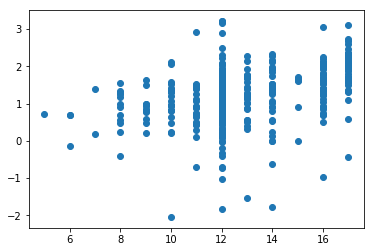

In [3]:
"""
plot of data in regression
"""

plt.scatter(df["educ"],df["log_wage"])

<h1>  2SLS </h1>

&rarr; Assume educ and our error term in the OLS is correlated. <br>
&rarr; Then we have to find some instrument for educ. <br>
&rarr; Here this is fatheduc, which is the education of the father. <br>
&rarr; Following code performs a 2SLS with fatheduc as an instument for educ. <br>

**educ** = explanatory variable <br>
**log_wages** = dependent variable <br>
**fatheduc** = instrumental variable

In [4]:
"""
2SLS --> 
"""

from statsmodels.sandbox.regression.gmm import IV2SLS   


X = df["educ"]
X = sm.add_constant(X)
Y = df['log_wage']
I = df["fatheduc"]
I = sm.add_constant(I)

resultIV = IV2SLS(Y,X,I).fit()
resultIV.predict()
resultIV.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.093
Model:                         IV2SLS   Adj. R-squared:                  0.091
Method:                     Two Stage   F-statistic:                     2.835
                        Least Squares   Prob (F-statistic):             0.0929
Date:                Thu, 13 Jun 2019                                         
Time:                        15:04:52                                         
No. Observations:                 428                                         
Df Residuals:                     426                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4411      0.446      0.989      0.323      -0.436       1.318
educ           0.0592      0.035      1.684      0.093      -0.010       0.128
==============================================================================
Omnibus:                       82.004   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.354
Skew:                          -0.876   Prob(JB):                     2.62e-55
Kurtosis:                       6.320   Cond. No.                         72.9
==============================================================================
"""